In [38]:
#Data manipulation libraries
import numpy as np
import pandas as pd


#Visualisation Libraries
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots
import plotly.express as px 
sb.set()


<h1> Data variables </h1>

<ul>
<li>Age | Objective Feature | age | int (days) Linear Regression/Clustering and then see each category data points (convert to years)
<li>Height | Objective Feature | height | int (cm) | Linear Regression/Clustering and then see each category data points (maybe not)
<li>Weight | Objective Feature | weight | float (kg) | Linear Regression/Clustering and then see each category data points (maybe not)
<li>Gender | Objective Feature | gender | categorical code | Correlation-Matrix to determine the probability analysis (split into male and female and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>BMI | added feature using height and weight | float | classification tree
<li>Systolic blood pressure | Examination Feature | ap_hi | int | classification tree
<li>Diastolic blood pressure | Examination Feature | ap_lo | int | classification tree
<li>Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | clustering and do analysis on it
<li>Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | clustering and do analysis on it
<li>Smoking | Subjective Feature | smoke | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Alcohol intake | Subjective Feature | alco | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Physical activity | Subjective Feature | active | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Presence or absence of cardiovascular disease | Target Variable | cardio | binary | Response


Binary Logistic Regression can be used

//get rid of outliers: -ve blood pressure, short height ie less than 120cm or a percentile, co


### Cleaning of Data

Removing missing values, duplicates



In [39]:
null_values = ['?', '--', ' ', 'NA', 'N/A', '-']
dataSet = pd.read_csv('./cardio_train.csv', delimiter=';', nrows = 70000, na_values = null_values) #delimiter function specifies the boundary between separate, independant regions in plain text or other data stream
dataSet.drop(columns=['id'], inplace=True) #No need ID variable
dataSet.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Missing Values:

In [40]:
var_null = [feature for feature in dataSet.columns if dataSet[feature].isnull().sum()>0] #Check for null values
if var_null:
    print('Features with Null Values {}'.format(var_null))
else:
    print('Dataset contains no Null Values')

Dataset contains no Null Values


#### Duplicates:


In [41]:
duplicate = dataSet.duplicated().sum()
if duplicate: #check for duplicate
    print('Duplicates Rows in Dataset are : {}'.format(duplicate))
else:
    print('Dataset contains no Duplicate Values')
duplicated = dataSet[dataSet.duplicated(keep=False)] #Duplicated data
dataSet.drop_duplicates(keep = 'first', inplace = True) # Drop duplicated data 
print('Total {} datapoints remaining with {} features'.format(dataSet.shape[0], dataSet.shape[1]))

Duplicates Rows in Dataset are : 24
Total 69976 datapoints remaining with 12 features


# Outliers:

##### Preview of Numerical Variables:

In [42]:
dataSet['years'] = (dataSet['age'] / 365).round().astype('int') # Conversion of age in months to years
numericalData = dataSet[['years', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']].copy()
numericalData.describe()


,years,age,height,weight,ap_hi,ap_lo
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,19468.950126,164.359152,74.208519,128.820453,96.636261
std,6.765633,2467.374620,8.211218,14.397211,154.037729,188.504581
min,30.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


Outliers:
1. Age has a very low min despite the average being 54yo and 25 percentile being 48yo. The low min might be outlier
2. Height min and max is suspiciously way too low/high, need plotting to see what is going on
3. Weight min is way too low to be physically possible, need plotting to see what is going on
4. ap_hi and ap_lo has negative values, which is not possible, need to remove negative values, use histogram to visualise

##### Outliers: Age

<AxesSubplot:xlabel='years', ylabel='Count'>

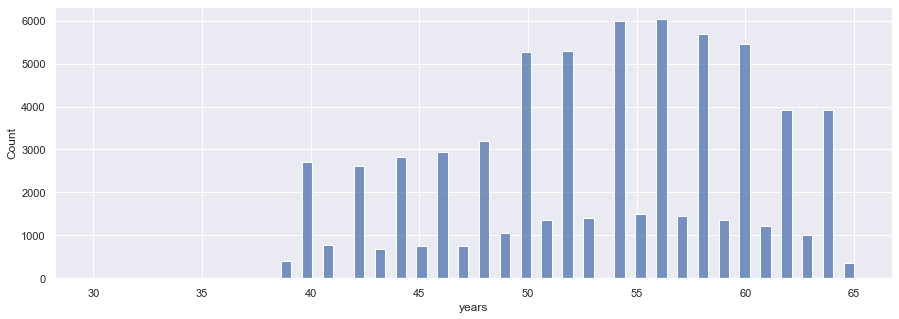

In [43]:
cleanedData = pd.DataFrame(dataSet)
cleanedData.drop(columns=['age'], inplace=True)
#Re-assign age to actual dataframe
age = pd.DataFrame(cleanedData['years'])
sb.histplot(data=age, x="years")

It seems that a good cut-off point for outliers is age 39

In [44]:
#Remove outliers
cleanedData.drop(cleanedData[(cleanedData.years < 39)].index, inplace=True)
cleanedData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000
mean,1.349654,164.358986,74.208916,128.821386,96.637641,1.367018,1.226548,0.088164,0.053793,0.803707,0.499800,53.340279
std,0.476864,8.211214,14.397121,154.042070,188.509870,0.680347,0.572367,0.283535,0.225610,0.397195,0.500004,6.763525
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


##### Outliers: Blood Pressure


In [45]:
bloodPressure = pd.DataFrame(cleanedData[['ap_hi', 'ap_lo']])
bloodPressure.describe()


,ap_hi,ap_lo
count,69972.000000,69972.000000
mean,128.821386,96.637641
std,154.042070,188.509870
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


Through our research, medical experts state that for ap_lo below 60mm hg and above 120mm hg is dangerous, whereas for ap_high below 90mm hg and the highest record level is 370mm hg. <br><br>It is safe to assume the viable range for ap_lo and ap_hi to be:

1. 50 < ap_lo < 120
2. 90 < ap_hi < 200

<br> Values that does not fall in this range are outliers

In [46]:
#Remove outliers
#drop anolymous data points
cleanedData.drop(cleanedData[(cleanedData.ap_lo < 50) | (cleanedData.ap_lo > 120) | (cleanedData.ap_hi > 180) | (cleanedData.ap_hi < 90)].index, inplace=True)
cleanedData.describe()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000
mean,1.348554,164.369371,74.093382,126.418300,81.230245,1.363394,1.225191,0.087721,0.053134,0.803507,0.493657,53.321819
std,0.476516,8.177802,14.292885,15.984809,9.193561,0.678142,0.571263,0.282891,0.224301,0.397348,0.499963,6.767310
min,1.000000,55.000000,11.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [47]:
cleanedData.drop(cleanedData[(cleanedData.ap_lo > cleanedData.ap_hi)].index, inplace=True)
cleanedData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,68259.000000,68259.000000,68259.000000,68259.000000,68259.000000,68259.000000,68259.000000,68259.000000,68259.000000,68259.000000,68259.000000,68259.000000
mean,1.348540,164.368977,74.092800,126.419827,81.229127,1.363410,1.225201,0.087710,0.053107,0.803513,0.493649,53.321877
std,0.476512,8.177648,14.292912,15.983493,9.192004,0.678153,0.571273,0.282875,0.224248,0.397344,0.499963,6.767289
min,1.000000,55.000000,11.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


##### Outliers: Height and weight

We use a boxplot and violin plot to visualise the data first

<AxesSubplot:xlabel='weight'>

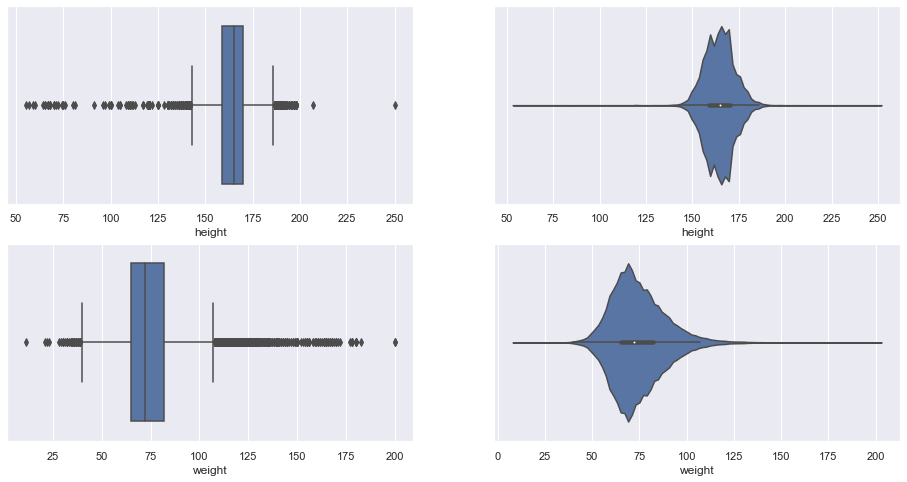

In [48]:
f, axes = plt.subplots(2, 2, figsize=(16, 8))
sb.boxplot(x = 'height', data = cleanedData , ax=axes[0][0])
sb.violinplot(x = 'height', data = cleanedData , ax=axes[0][1])
sb.boxplot(x = 'weight', data = cleanedData , ax=axes[1][0])
sb.violinplot(x = 'weight', data = cleanedData , ax=axes[1][1])

We will use interquartile range to removed the outliers for weight

In [49]:
#Weight
cleanedData_copy = cleanedData.copy(deep=True)
q75 = cleanedData_copy.weight.quantile(0.75)
q25 = cleanedData_copy.weight.quantile(0.25)
IQR = q75-q25
print(IQR)
outlierHead = q25 - IQR
outlierTail = q75 + IQR
print(outlierTail)
cleanedData_copy.drop(cleanedData_copy[(cleanedData_copy.weight > outlierHead) & (cleanedData_copy.weight < outlierTail)].index, inplace=True)
cleanedData_copy.describe()

17.0
99.0


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.00000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000
mean,1.388913,165.788099,98.403221,132.675514,84.358091,1.555437,1.35274,0.109803,0.074058,0.794092,0.610017,53.328767
std,0.487556,10.454377,26.501634,18.787184,10.461088,0.784353,0.66966,0.312678,0.261894,0.404407,0.487798,6.872310
min,1.000000,75.000000,11.000000,90.000000,50.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,100.000000,120.000000,80.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,104.000000,130.000000,80.000000,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,54.000000
75%,2.000000,173.000000,111.000000,140.000000,90.000000,2.000000,1.00000,0.000000,0.000000,1.000000,1.000000,59.000000
max,2.000000,198.000000,200.000000,180.000000,120.000000,3.000000,3.00000,1.000000,1.000000,1.000000,1.000000,65.000000


We lose a lot of datapoints if we use IQR. So for weight we will use z-score method with the recommended threshold of 3 standard deviation. We also can assume normal distribition for height and weight as our violin plot does resemble the gaussian distribution and our sample size is large enough.

In [50]:
threshold = 3
mean = cleanedData['weight'].mean()
SD = cleanedData['weight'].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
cleanedData.drop(cleanedData[(cleanedData.weight < outlierHead) | (cleanedData.weight > outlierTail)].index, inplace=True)
cleanedData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,67551.000000,67551.000000,67551.000000,67551.000000,67551.000000,67551.000000,67551.000000,67551.000000,67551.000000,67551.000000,67551.000000,67551.000000
mean,1.347826,164.334429,73.534416,126.289707,81.163491,1.360468,1.222587,0.087223,0.052775,0.803645,0.491392,53.327723
std,0.476284,8.117744,13.149793,15.907656,9.156307,0.676108,0.568624,0.282164,0.223586,0.397243,0.499930,6.766503
min,1.000000,55.000000,32.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,116.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Height is next:

In [51]:
#Height
cleanedData_copy = cleanedData.copy(deep=True)
q75 = cleanedData_copy.height.quantile(0.75)
q25 = cleanedData_copy.height.quantile(0.25)
IQR = q75-q25
print(IQR)
outlierHead = q25 - IQR
outlierTail = q75 + IQR
print(outlierHead)
cleanedData_copy.drop(cleanedData_copy[(cleanedData_copy.height > outlierHead) & (cleanedData_copy.height < outlierTail)].index, inplace=True)
cleanedData_copy.describe()

11.0
148.0


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000
mean,1.507730,164.971115,76.732994,127.646867,81.805126,1.403173,1.217250,0.126526,0.072417,0.794142,0.508950,53.565094
std,0.500042,22.744488,17.716259,16.815108,9.616108,0.706230,0.558353,0.332508,0.259229,0.404410,0.500022,6.894817
min,1.000000,55.000000,32.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,146.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000
50%,2.000000,181.000000,78.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.000000
75%,2.000000,184.000000,90.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,2.000000,250.000000,116.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Same with weight, we will use z-score for height as well

In [52]:
threshold = 3
mean = cleanedData['height'].mean()
SD = cleanedData['height'].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
cleanedData.drop(cleanedData[(cleanedData.height < outlierHead) | (cleanedData.height > outlierTail)].index, inplace=True)
cleanedData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,67289.000000,67289.000000,67289.000000,67289.000000,67289.000000,67289.000000,67289.000000,67289.000000,67289.000000,67289.000000,67289.000000,67289.000000
mean,1.347040,164.376198,73.515504,126.292485,81.166417,1.360951,1.222815,0.087057,0.052713,0.803906,0.491477,53.329668
std,0.476032,7.682895,13.130499,15.908207,9.153195,0.676464,0.568858,0.281921,0.223461,0.397044,0.499931,6.765401
min,1.000000,140.000000,32.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,188.000000,116.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Since the rest of the variables are categorical, this ends our outlier remover.

# Exploratory Analysis

Response: Presence or absence of cardiovascular disease<br>
Analysis of each variable w.r.t Response

##### Age

<AxesSubplot:xlabel='years', ylabel='count'>

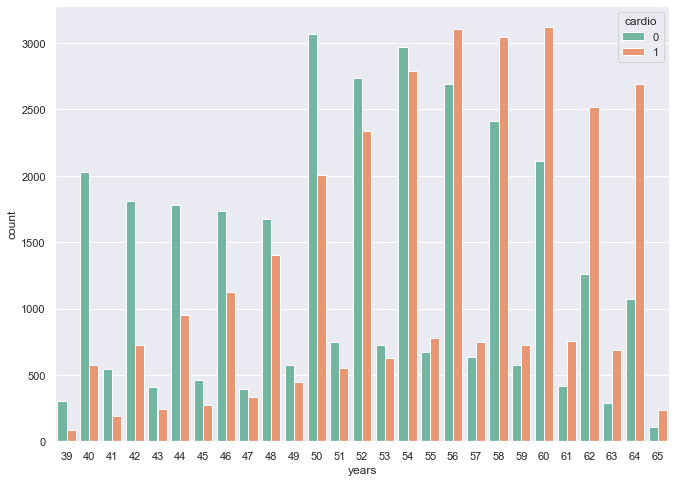

In [53]:
rcParams['figure.figsize'] = 11, 8
sb.countplot(x='years', hue='cardio', data = cleanedData, palette="Set2")


There seems to be a correlation between age and one having CVD. This is a factor we should consider for our model.
As the age increase, the number of people CVD increase such that it is more than the people who do not have CVD in that same age.<br><br>This is a factor we should consider for our model.

##### Weight

<AxesSubplot:xlabel='weight', ylabel='Count'>

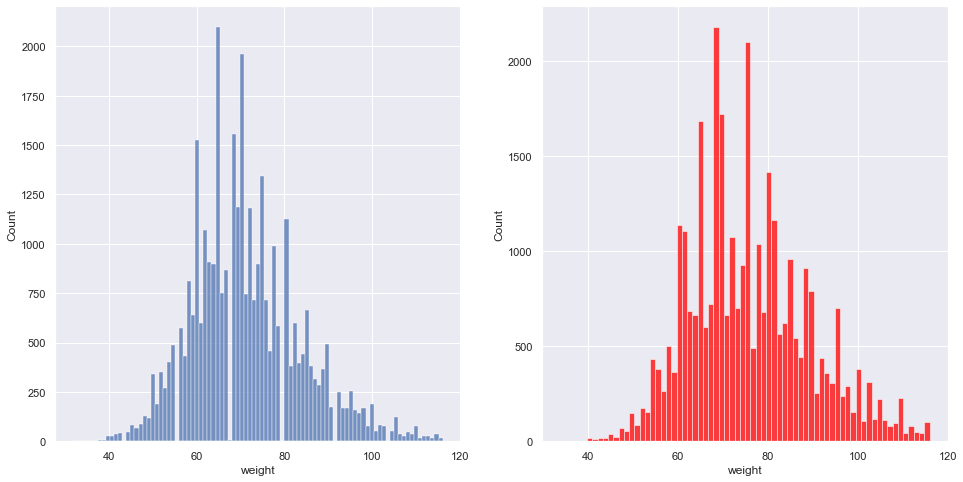

In [54]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'weight'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'weight'].copy()
sb.histplot(data=non_cvd, ax=axes[0])
sb.histplot(data=cvd, ax=axes[1], color='red')

There is not a noticeable difference in terms of height between the population of ppl with CVD and people without CVD.
<br><br>Thus weight will not be one of our factors to consider for our model

##### Height

<AxesSubplot:xlabel='height', ylabel='Count'>

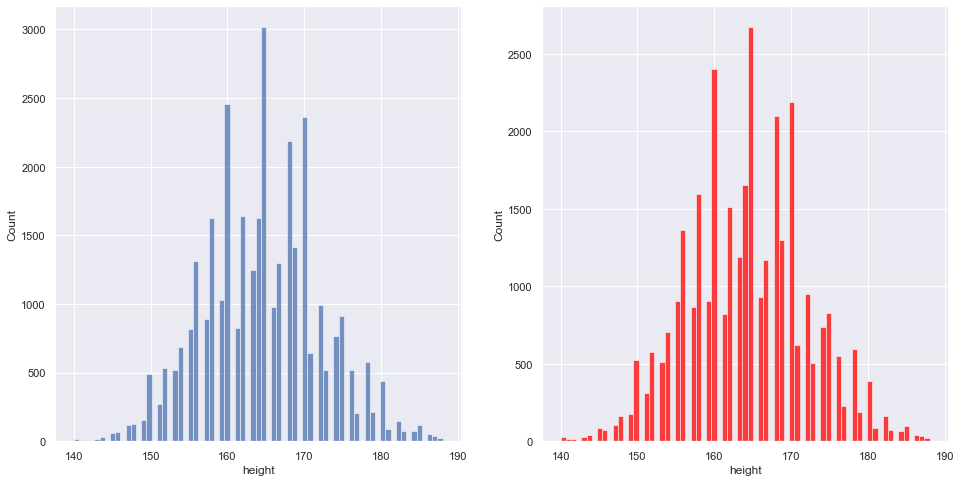

In [55]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'height'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'height'].copy()
sb.histplot(data=non_cvd, ax=axes[0])
sb.histplot(data=cvd, ax=axes[1], color='red')

Same with weight, there is not a noticeable difference in terms of height between the population of ppl with CVD and people without CVD.
<br><br>Thus height will not be one of our factors to consider for our model

##### Gender

In [56]:
#Gender
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'gender'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'gender'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD gender distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['Female', 'Male']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['Female', 'Male']),row=1, col=2)
fig.show()




There is not much difference between the distribution of gender from CVD population and non-CVD population.

<br>Thus Gender is not a factor that needs to be considered.

##### Systolic blood pressure

<AxesSubplot:xlabel='ap_hi', ylabel='Count'>

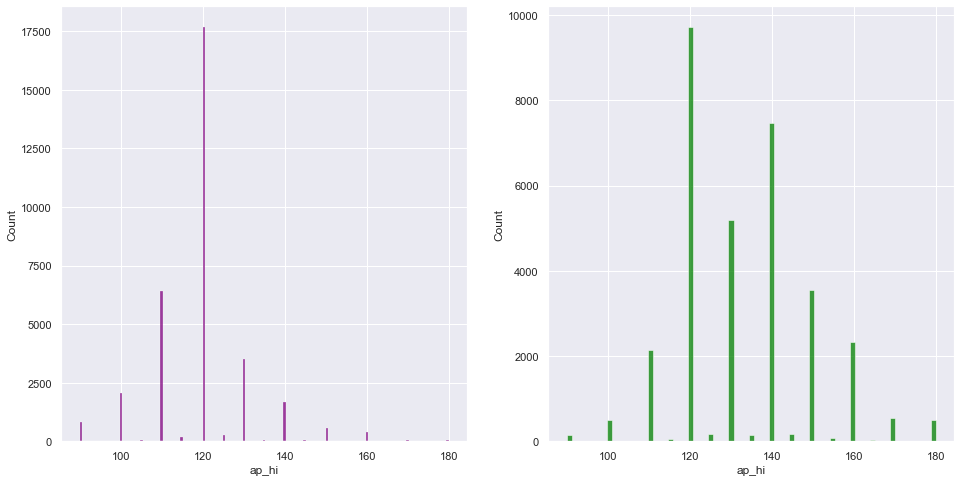

In [57]:
# Systolic Blood Pressure
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'ap_hi'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'ap_hi'].copy()
sb.histplot(data=non_cvd, ax=axes[0], color='purple')
sb.histplot(data=cvd, ax=axes[1], color='green')

In [58]:
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'ap_hi'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'ap_hi'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD ap_hi distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values, labels=cleanedData[cleanedData['cardio'] == 0]['ap_hi'].value_counts().index.to_list()),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values, labels=cleanedData[cleanedData['cardio'] == 1]['ap_hi'].value_counts().index.to_list()),row=1, col=2)
fig.update_traces(textposition='inside')
fig.show()



From the histograms and pie Chart, we can see that for Systolic blood pressure, up till 120 mm hg, the pattern is the same. But for 120mm hg and onwards, there is a noticeable increase in population of ppl having cvd for Systolic blood pressure of more than 120mm hg.

Thus we can consider Systolic blood pressure as a factor.

##### Diastolic blood pressure

<AxesSubplot:xlabel='ap_lo', ylabel='Count'>

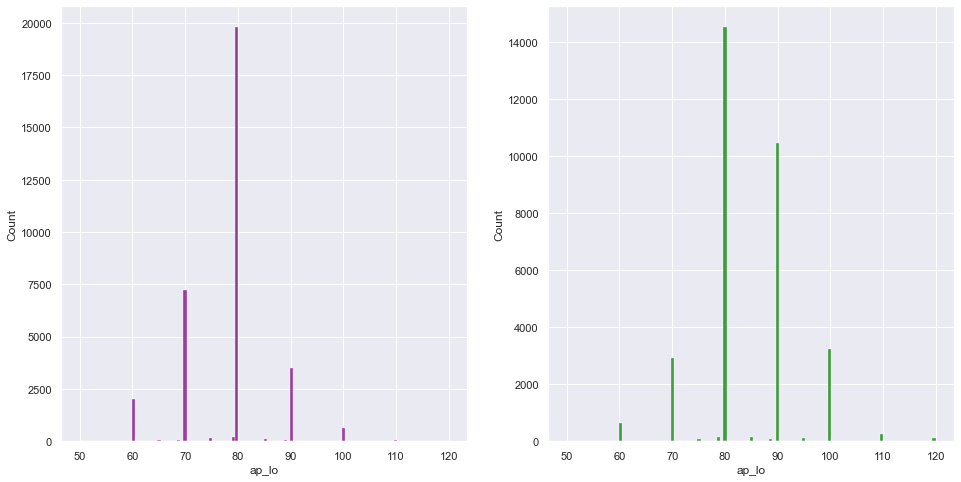

In [59]:
#Diastolic Blood Pressure
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'ap_lo'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'ap_lo'].copy()
sb.histplot(data=non_cvd, ax=axes[0], color='purple')
sb.histplot(data=cvd, ax=axes[1], color='green')

In [60]:
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'ap_hi'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'ap_hi'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD ap_lo distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values, labels=cleanedData[cleanedData['cardio'] == 0]['ap_lo'].value_counts().index.to_list()),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values, labels=cleanedData[cleanedData['cardio'] == 1]['ap_lo'].value_counts().index.to_list()),row=1, col=2)
fig.update_traces(textposition='inside')
fig.show()

Likewise with Systolic Blood Pressure, from the histograms and pie Chart, we can see that for Diastolic blood pressure, up till 80 mm hg, the pattern is the same. But for 120mm hg and onwards, there is a noticeable increase in population of ppl having cvd for Diastolic blood pressure of more than 80mm hg.

Thus we can consider Diastolic blood pressure as a factor.

##### Cholesterol

In [61]:
#Cholesterol
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'cholesterol'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'cholesterol'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD Cholesterol distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['normal' ,'above normal', 'well above normal']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['normal' ,'above normal', 'well above normal']),row=1, col=2)
fig.show()

There seems to be some correlation of cholesterol level with CVD as there is very significant increase for the category "well above normal". We may want to consider this factor in our prediction model.

##### Glucose

In [62]:
#glucose
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'gluc'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'gluc'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD glucose distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['normal' ,'above normal', 'well above normal']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['normal' ,'above normal', 'well above normal']),row=1, col=2)
fig.show()

There does not seems to be some correlation of glucose level with CVD as their pie-chart looked similar, compared to cholesterol level. We should not consider this factor in our prediction model.

##### Smoking

In [63]:
#Smoking
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'smoke'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'smoke'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD smoking distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['Dont smoke', 'Smoke']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['Dont smoke', 'Smoke']),row=1, col=2)
fig.show()

Similarly to glucose level, there does not seems to be some correlation of smoking with CVD as their pie-chart looked similar, compared to cholesterol level. We should not consider this factor in our prediction model.

##### Alcohol intake

In [64]:
#Alcohol-intake
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'alco'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'alco'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD Alcohol-intake distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['Dont Drink', 'Drinks']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['Dont Drink', 'Drinks']),row=1, col=2)
fig.show()

Similarly to glucose level, there does not seems to be some correlation of alchohol consumption with CVD as their pie-chart looked similar, compared to cholesterol level. We should not consider this factor in our prediction model.

##### Physical activity

In [65]:
#Physical Activity
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'active'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'active'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD Physical Activity distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['Not Active', 'Is active']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['Not Active', 'Is active']),row=1, col=2)
fig.show()

Similarly to glucose level, there does not seems to be some correlation of physical activity with CVD as their pie-chart looked similar, compared to cholesterol level. We should not consider this factor in our prediction model.

### Calculated values, may or may consider

##### BMI (Calculated using height and weight)

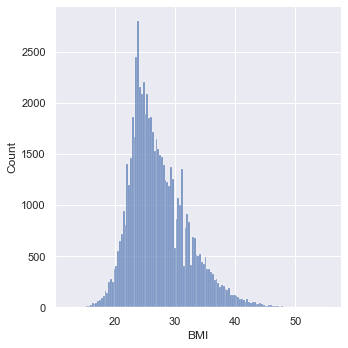

In [66]:
cleanedData['BMI'] = cleanedData['weight']/((cleanedData['height']*0.01)**2)
rcParams['figure.figsize'] = 8, 8
sb.displot(data=cleanedData, x='BMI')

<AxesSubplot:xlabel='BMI', ylabel='Count'>

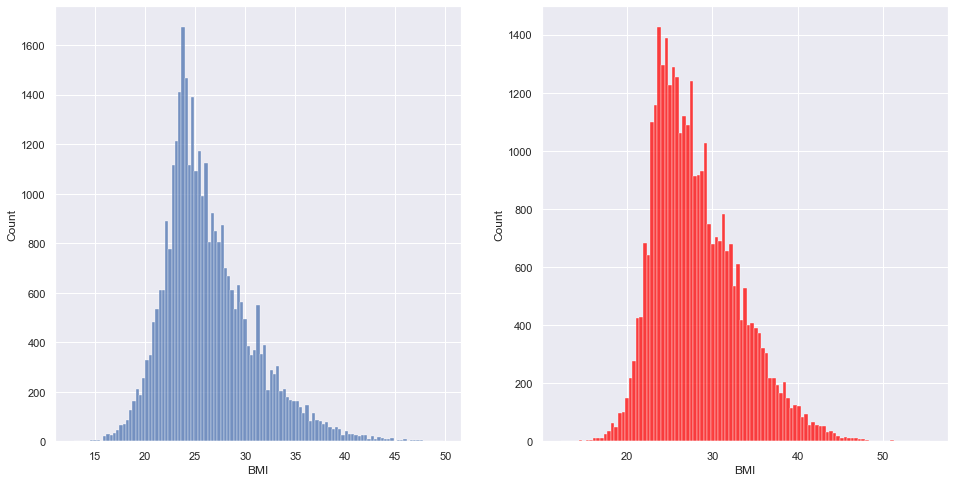

In [67]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'BMI'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'BMI'].copy()
sb.histplot(data=non_cvd, ax=axes[0])
sb.histplot(data=cvd, ax=axes[1], color='red')

##### Pulse pressure (Calculated using Systolic blood pressure and Diastolic blood pressure)

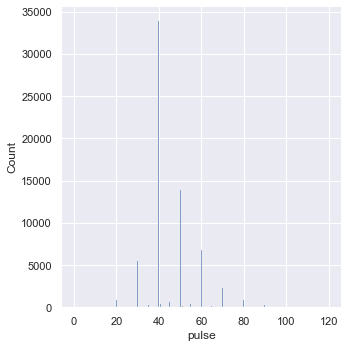

In [68]:
cleanedData['pulse'] = cleanedData['ap_hi'] - cleanedData['ap_lo']
rcParams['figure.figsize'] = 15, 5
sb.displot(data=cleanedData, x='pulse')


1     50
2     60
3     50
7     40
15    40
Name: pulse, dtype: int64

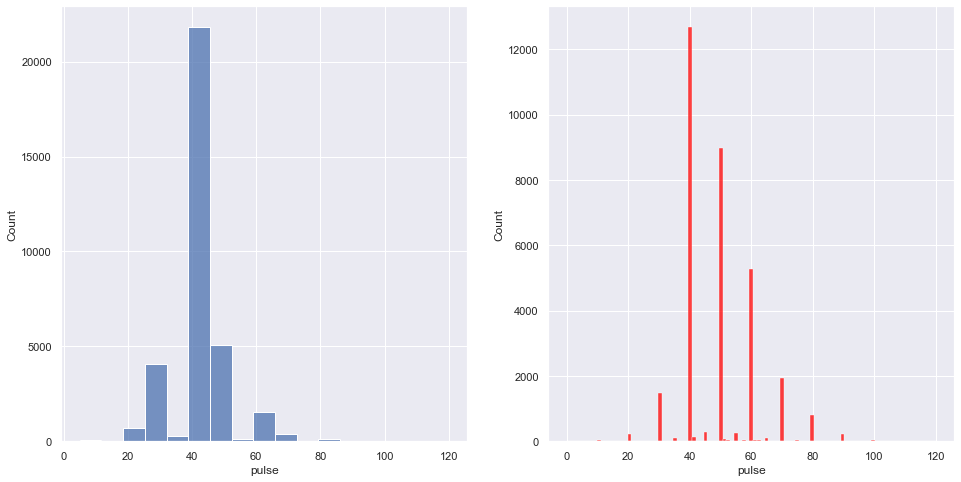

In [69]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'pulse'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'pulse'].copy()
sb.histplot(data=non_cvd, ax=axes[0])
sb.histplot(data=cvd, ax=axes[1], color='red')
cvd.head()


# Machine Learning

In [ ]:
#Machine Learning Libraries
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report  # for model evaluation metrics
from sklearn.metrics import confusion_matrix  # for evaluating TN TP FN FP

#Graphing Tree
from sklearn.tree import plot_tree

#Check Runtime of Each ML Model
from datetime import datetime


### DecisionTree  

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7311400494139065

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7305691781839798
--------------------------------------------------------
Accuracy Score:  0.7305691781839798
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6801
           1       0.76      0.67      0.71      6657

    accuracy                           0.73     13458
   macro avg       0.73      0.73      0.73     13458
weighted avg       0.73      0.73      0.73     13458



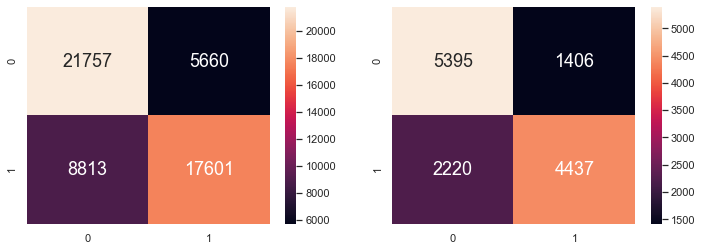

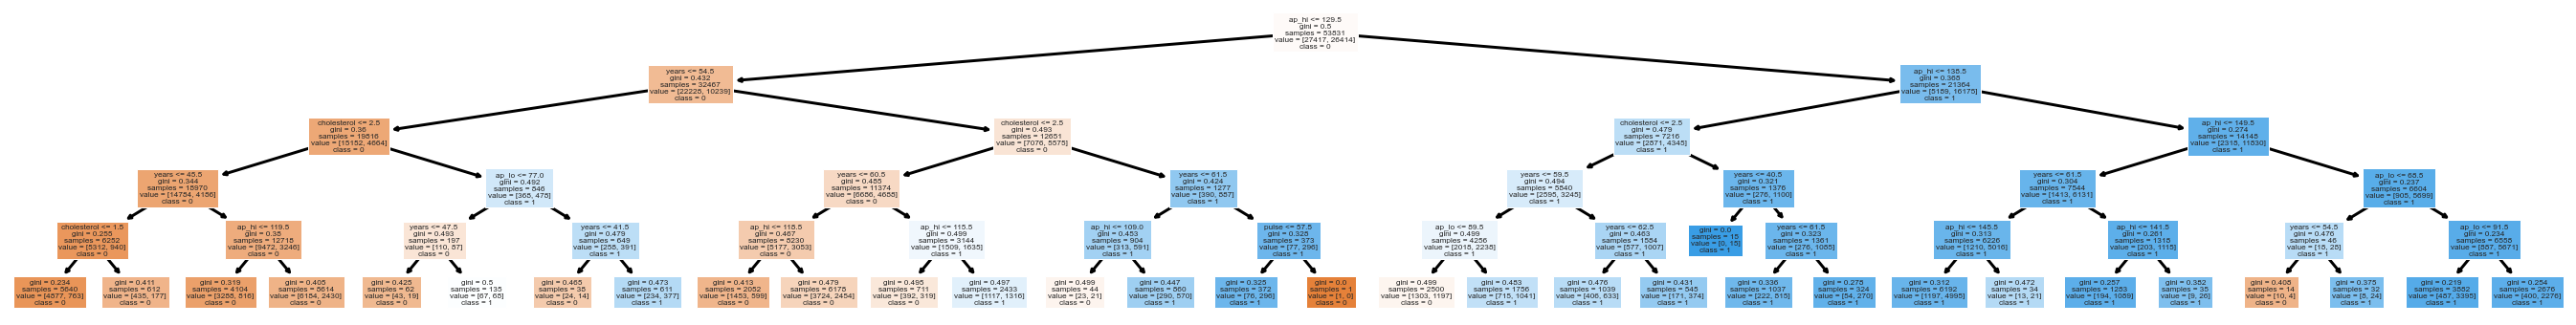

Time elapsed (hh:mm:ss.ms) 0:00:02.041769


In [70]:
from sklearn.tree import DecisionTreeClassifier

start_time = datetime.now()

def deciscionTreeClassifier_1(data):
    cleanedData = data.copy()
    response = pd.DataFrame(cleanedData['cardio'])
    predictor = pd.DataFrame(cleanedData[['ap_hi', 'ap_lo', 'years', 'pulse', 'cholesterol']])

    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size=0.2)

    # create the decision tree object
    dectree = DecisionTreeClassifier(max_depth=5)
    # train the decision tree model
    dectree.fit(X_train, y_train)

    # Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print('--------------------------------------------------------')
    score = dectree.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    # Look at classification report to evaluate the model
    print(classification_report(y_test, y_test_pred))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred),
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

    # Plot the Decision Tree
    fig, ax = plt.subplots(figsize=(48, 6))
    out = plot_tree(dectree,
                    feature_names=predictor.columns,
                    class_names=[str(x) for x in dectree.classes_],
                    filled=True)

    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(3)

    plt.show()

deciscionTreeClassifier_1(cleanedData)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

### Naive Bayes Model

Classes:  [0 1]
Class Priors:  [0.50723561 0.49276439]
--------------------------------------------------------
Accuracy Score:  0.7249962847377025
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.83      0.76      6913
           1       0.77      0.61      0.68      6545

    accuracy                           0.72     13458
   macro avg       0.73      0.72      0.72     13458
weighted avg       0.73      0.72      0.72     13458

Time elapsed (hh:mm:ss.ms) 0:00:00.263001


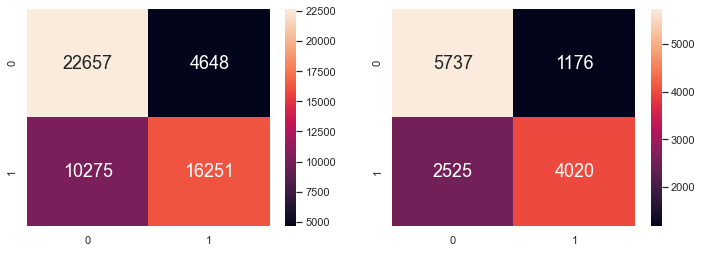

In [71]:
# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

start_time = datetime.now()


def naiveBayes(data):
  cleanedData = data.copy()

  # Gaussian, i.e. continuous
  X_Gaussian = cleanedData[['years', 'ap_hi', 'ap_lo', 'pulse']]
  X_Categorical = cleanedData['cholesterol']  # Categorical, i.e. discrete
  response = cleanedData['cardio'].copy()

  # Combine all four variables into one array
  predictor = np.c_[X_Gaussian, X_Categorical.ravel()]

  # Create training and testing samples
  X_train, X_test, y_train, y_test = train_test_split(
      predictor, response, test_size=0.2)


  # ----- Fit the two models -----
  # Now use the Gaussian model for continuous independent variable and
  gaussian_model = GaussianNB()
  gaussian_model.fit(X_train[:, 0:4], y_train)
  # Categorical model for discrete independent variable
  categorical_model = CategoricalNB()
  categorical_model.fit(X_train[:, 4:5], y_train)


  # ----- Get probability predictions from each model -----
  # On training data
  G_train_probas = gaussian_model.predict_proba(X_train[:, 0:4])
  C_train_probas = categorical_model.predict_proba(X_train[:, 4:5])
  # And on testing data
  G_test_probas = gaussian_model.predict_proba(X_test[:, 0:4])
  C_test_probas = categorical_model.predict_proba(X_test[:, 4:5])

  # Combine probability prediction for class=1 from both models into a 2D array
  X_new_train = np.c_[(G_train_probas[:, 1], C_train_probas[:, 1])]  # Train
  X_new_test = np.c_[(G_test_probas[:, 1], C_test_probas[:, 1])]  # Test


  # ----- Fit Gaussian model on the X_new -----
  model = GaussianNB()
  naiveBayes = model.fit(X_new_train, y_train)
  pred_train = model.predict(X_new_train)

  # Predict class labels on a test data
  pred_labels = model.predict(X_new_test)


  # ----- Print results -----
  print('Classes: ', naiveBayes.classes_)  # class labels known to the classifier
  # probability of each class.
  print('Class Priors: ', naiveBayes.class_prior_)
  # Use score method to get accuracy of model
  print('--------------------------------------------------------')
  score = model.score(X_new_test, y_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')
  # Look at classification report to evaluate the model
  print(classification_report(y_test, pred_labels))

  # Plot the Confusion Matrix for Train and Test
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(y_train, pred_train),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
  sb.heatmap(confusion_matrix(y_test, pred_labels),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

naiveBayes(cleanedData)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))


### LightGBM 


Classes:  [0 1]
--------------------------------------------------------
Accuracy Score:  0.7294545994947244
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6858
           1       0.75      0.67      0.71      6600

    accuracy                           0.73     13458
   macro avg       0.73      0.73      0.73     13458
weighted avg       0.73      0.73      0.73     13458

Time elapsed (hh:mm:ss.ms) 0:00:00.685001


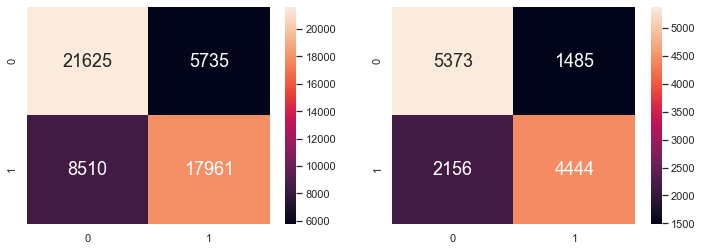

In [72]:
import lightgbm as lbgm
from datetime import datetime

start_time = datetime.now()

def lightGBM(data):
  cleanedData = data.copy()
  response = cleanedData['cardio'].copy()
  predictor = cleanedData[['ap_hi', 'ap_lo','years', 'pulse', 'cholesterol']].copy()

  X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size=0.2)

  lightGBM_model = lbgm.LGBMClassifier()
  lightGBM_model.fit(X_train, y_train)
  predicted_test = lightGBM_model.predict(X_test)
  predicted_train = lightGBM_model.predict(X_train)

  # ----- Print results -----
  # class labels known to the classifier
  print('Classes: ', lightGBM_model.classes_)
  # Use score method to get accuracy of model
  print('--------------------------------------------------------')
  score = lightGBM_model.score(X_test, y_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')
  # Look at classification report to evaluate the model
  print(classification_report(y_test, predicted_test))

  # Plot the Confusion Matrix for Train and Test
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(y_train, predicted_train),
             annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
  sb.heatmap(confusion_matrix(y_test, predicted_test),
             annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])


lightGBM(cleanedData)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))


### Ridge Classifier

Classes:  [0 1]
--------------------------------------------------------
Accuracy Score:  72.17
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.80      0.75      6819
           1       0.76      0.64      0.69      6639

    accuracy                           0.72     13458
   macro avg       0.73      0.72      0.72     13458
weighted avg       0.73      0.72      0.72     13458

Time elapsed (hh:mm:ss.ms) 0:00:00.240000


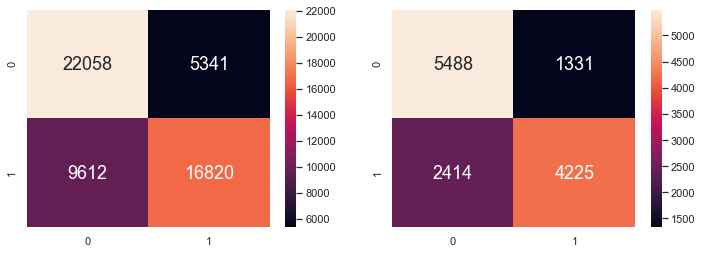

In [73]:
from sklearn.linear_model import RidgeClassifier
from datetime import datetime

start_time = datetime.now()

def ridgeClassifier(data):
  cleanedData = data.copy()
  response = cleanedData['cardio'].copy()
  predictor = cleanedData[['ap_hi', 'ap_lo','years', 'pulse', 'cholesterol']].copy()

  X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size=0.2, random_state=0)
  ridge_classifier = RidgeClassifier()
  ridge_classifier.fit(X_train, y_train)
  predicted_test = ridge_classifier.predict(X_test)
  predicted_train = ridge_classifier.predict(X_train)
  # ----- Print results -----
  # class labels known to the classifier
  print('Classes: ', ridge_classifier.classes_)
  # Use score method to get accuracy of model
  print('--------------------------------------------------------')
  score = round(ridge_classifier.score(X_test, y_test) * 100, 2)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')
  # Look at classification report to evaluate the model
  print(classification_report(y_test, predicted_test))

  # Plot the Confusion Matrix for Train and Test
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(y_train, predicted_train),
             annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
  sb.heatmap(confusion_matrix(y_test, predicted_test),
             annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

ridgeClassifier(cleanedData)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))


### Log Regression

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7222789842284185

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7280427998216674

--------------------------------------------------------
Accuracy Score:  0.7280427998216674
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6845
           1       0.77      0.64      0.70      6613

    accuracy                           0.73     13458
   macro avg       0.73      0.73      0.73     13458
weighted avg       0.73      0.73      0.73     13458



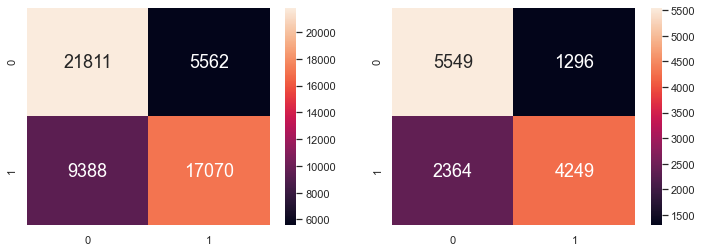

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def logRegression(data):
    cleanedData = data.copy()
    
    predictor = cleanedData[['years', 'ap_hi','ap_lo', 'pulse', 'cholesterol']]
    response = cleanedData['cardio']

    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size=0.2)


    logreg = LogisticRegression()  # create the logreg object
    logreg.fit(X_train, y_train)   # train the decision tree model

    # Predict Response corresponding to Predictors
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", logreg.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", logreg.score(X_test, y_test))
    print()


    print('--------------------------------------------------------')
    score = logreg.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    # Look at classification report to evaluate the model
    print(classification_report(y_test, y_test_pred))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])


    plt.show()

logRegression(cleanedData)


### Random Forest

Train accuracy 74.82
Test Accuracy: 72.37
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7481934201482418

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7232129588348938

--------------------------------------------------------
Accuracy Score:  0.7232129588348938
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6846
           1       0.74      0.67      0.70      6612

    accuracy                           0.72     13458
   macro avg       0.73      0.72      0.72     13458
weighted avg       0.72      0.72      0.72     13458



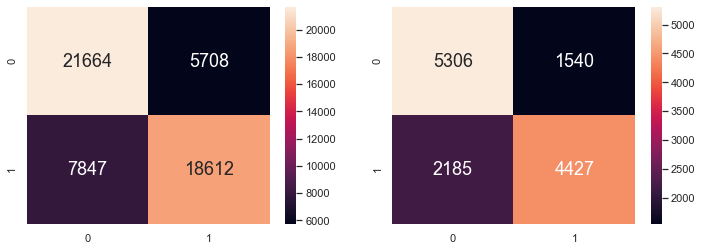

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


def randomForest(data):
  cleanedData = data.copy()
  response = cleanedData['cardio'].copy()
  predictor = cleanedData[['ap_hi', 'ap_lo','years', 'pulse', 'cholesterol']].copy()

  X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size=0.2)
  random_forest = RandomForestClassifier(n_estimators=100)
  random_forest.fit(X_train, y_train)
  acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
  print("Train accuracy", acc_random_forest)


  acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
  print("Test Accuracy:", acc_test_random_forest)

  randoforest = random_forest  # create the randoforest object
  # train the decision tree model
  randoforest.fit(X_train, y_train.ravel())

  # Predict Response corresponding to Predictors
  y_train_pred = randoforest.predict(X_train)
  y_test_pred = randoforest.predict(X_test)

  # Check the Goodness of Fit (on Train Data)
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Classification Accuracy \t:", randoforest.score(X_train, y_train))
  print()

  # Check the Goodness of Fit (on Test Data)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Classification Accuracy \t:", randoforest.score(X_test, y_test))
  print()


  print('--------------------------------------------------------')
  score = randoforest.score(X_test, y_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')
  # Look at classification report to evaluate the model
  print(classification_report(y_test, y_test_pred))

  # Plot the Confusion Matrix for Train and Test
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(y_train, y_train_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
  sb.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])


  plt.show()

randomForest(cleanedData)
